In [1]:
import yt
import pickle
import trident
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/claire/miniconda3/envs/salsa/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ion = "N_IV"
ray = 1

# Catalogue super clump comparisons to show off

In [3]:
with open(f"superclump/Match_{ion}_Ray{ray}.pickle", "rb") as f:
    match = pickle.load(f)
    
with open(f"superclump/MaybeLonely_{ion}_Ray{ray}.pickle", "rb") as f:
    lonely = pickle.load(f)
    
with open(f"superclump/Short_{ion}_Ray{ray}.pickle", "rb") as f:
    short = pickle.load(f)
    
with open(f"superclump/Split_{ion}_Ray{ray}.pickle", "rb") as f:
    split = pickle.load(f)
    
sc_arr = np.load(f"superclump/super_clumps_array_{ion}_ray{ray}.npy")

In [4]:
match_pat = 12
match_ivl = match[match_pat][3]
print(match_ivl)

[523, 587]


These should be "true" splits, where velocities agree.

In [5]:
split_pat = 6
split_ivls = split[split_pat]
print(split_ivls)

[[523, 561], [562, 587]]


In [6]:
short_pat = 13
short_ivl = short[short_pat][0]
print(short_ivl)

[530, 556]


In [8]:
model_names = {6 :"K10 K06 0.5HNe", # AGB yields from Karaks and massive star yields from Kobayashi06.					
                                    # The yields of supernova and hypernova are combined 50% to 50% when hypernova yields are available.	
                                    # Yield set ID K10K06 in Ritter et al. 2017.
               12:"NuGrid FRUITY", # F.R.U.I.T.Y., Cristallo et al.
                                   # AGB yields are from FRUITY and massive star yields (delayed explosion) from NuGrid. Lifetimes for AGB models 
                                   # were taken from NuGrid. Note NuGrid models are based on alpha-enhanced initial abundances 
                                   # at Z=0.006 and Z=0.001 while FRUITY models are not. 
                                   # Note: Adjust the yield mass range to imf_yields_range=[1.3,30].
               13:"NuGrid K06",
               14:"NuGrid K10"} # AGB yields from Karakas10 and massive star yields (delayed explosion) from NuGrid.
                                # Lifetimes were not available for 2Msun at Z=0.004,0.008 and were supplied from 1.9Msun cases.

# Load associated SALSA data (to check intervals and velocities)

In [9]:
match_dat = pd.read_csv(f"data/data_AbundanceRow{match_pat:02d}_{ion}.txt", delim_whitespace=True)
match_row = match_dat[match_dat["lightray_index"]==ray].iloc[3]
assert [match_row["interval_start"], match_row["interval_end"]] == match_ivl
match_row[["delta_v","vel_dispersion"]]

delta_v          -12.060519
vel_dispersion    12.126801
Name: 5, dtype: object

In [10]:
split_dat = pd.read_csv(f"data/data_AbundanceRow{split_pat:02d}_{ion}.txt", delim_whitespace=True)
split_row = split_dat[split_dat["lightray_index"]==ray]
split_row1 = split_row.iloc[0]
split_row2 = split_row.iloc[1]
assert [split_row1["interval_start"], split_row1["interval_end"]] == split_ivls[0]
assert [split_row2["interval_start"], split_row2["interval_end"]] == split_ivls[1]
#split_row1["delta_v"] + 2*split_row1["vel_dispersion"], split_row2["delta_v"] - 2*split_row2["vel_dispersion"]
split_row1[["delta_v","vel_dispersion"]],split_row2[["delta_v","vel_dispersion"]]

(delta_v          -13.369692
 vel_dispersion    11.350407
 Name: 2, dtype: object,
 delta_v           4.923573
 vel_dispersion    8.541963
 Name: 3, dtype: object)

In [11]:
short_dat = pd.read_csv(f"data/data_AbundanceRow{short_pat:02d}_{ion}.txt", delim_whitespace=True)
short_row = short_dat[short_dat["lightray_index"]==ray].iloc[0]
assert [short_row["interval_start"], short_row["interval_end"]] == short_ivl
short_row[["delta_v","vel_dispersion"]]

delta_v          -11.135904
vel_dispersion     8.307105
Name: 2, dtype: object

# Load associated abundance patterns 

Will load text header. Let it! Abundance rows are counted from 1 (up to 21), but numpy indexes from 0. A dummy1 row 0 let's us index properly.

In [12]:
abundances = np.genfromtxt("/home/claire/trident_uncertainty/mods/abundances/abundances_AGB_massive_yields_halo8508_z2.0.txt")

In [13]:
with open("/home/claire/trident_uncertainty/mods/abundances/abundances_AGB_massive_yields_halo8508_z2.0.txt") as f:
    elements = f.readline().strip().split(' ')

In [14]:
match_abun = dict(zip(elements, abundances[match_pat]))
split_abun = dict(zip(elements, abundances[split_pat]))
short_abun = dict(zip(elements, abundances[short_pat]))

In [15]:
atom, istate = ion.split('_')
field_name = f"{atom}_p{trident.from_roman(istate)-1}_number_density"

In [16]:
ds = yt.load(f"rays/ray{ray}.h5")
trident.add_ion_number_density_field(atom, trident.from_roman(istate), ds, abundance_dict=match_abun)
match_ndens = ds.r[('gas',field_name)].copy()

yt : [INFO     ] 2022-10-05 16:10:02,876 Parameters: current_time              = 154.80103271343 code_time
yt : [INFO     ] 2022-10-05 16:10:02,876 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-10-05 16:10:02,877 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-10-05 16:10:02,879 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2022-10-05 16:10:02,880 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-10-05 16:10:02,880 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2022-10-05 16:10:02,882 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-10-05 16:10:02,882 Parameters: omega_matter              = 0.285
yt : [ERROR    ] 2022-10-05 16:10:02,882 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2022-10-05 16:10:02,883 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2022-10-05 16:10:02,948 Allocating for 8.95

Buckle up bc we're about to get wRIGGITY WRIGGITY WRECKED SON


In [17]:
ds = yt.load(f"rays/ray{ray}.h5")
trident.add_ion_number_density_field(atom, trident.from_roman(istate), ds, abundance_dict=split_abun)
split_ndens = ds.r[('gas',field_name)].copy()

yt : [INFO     ] 2022-10-05 16:10:03,350 Parameters: current_time              = 154.80103271343 code_time
yt : [INFO     ] 2022-10-05 16:10:03,351 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-10-05 16:10:03,352 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-10-05 16:10:03,352 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2022-10-05 16:10:03,353 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-10-05 16:10:03,354 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2022-10-05 16:10:03,355 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-10-05 16:10:03,355 Parameters: omega_matter              = 0.285
yt : [ERROR    ] 2022-10-05 16:10:03,356 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2022-10-05 16:10:03,358 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2022-10-05 16:10:03,421 Allocating for 8.95

Buckle up bc we're about to get wRIGGITY WRIGGITY WRECKED SON


In [18]:
ds = yt.load(f"rays/ray{ray}.h5")
trident.add_ion_number_density_field(atom, trident.from_roman(istate), ds, abundance_dict=short_abun)
short_ndens = ds.r[('gas',field_name)].copy()

yt : [INFO     ] 2022-10-05 16:10:03,741 Parameters: current_time              = 154.80103271343 code_time
yt : [INFO     ] 2022-10-05 16:10:03,742 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-10-05 16:10:03,743 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-10-05 16:10:03,743 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2022-10-05 16:10:03,744 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-10-05 16:10:03,744 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2022-10-05 16:10:03,745 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-10-05 16:10:03,745 Parameters: omega_matter              = 0.285
yt : [ERROR    ] 2022-10-05 16:10:03,746 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2022-10-05 16:10:03,746 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2022-10-05 16:10:03,807 Allocating for 8.95

Buckle up bc we're about to get wRIGGITY WRIGGITY WRECKED SON


# Plot

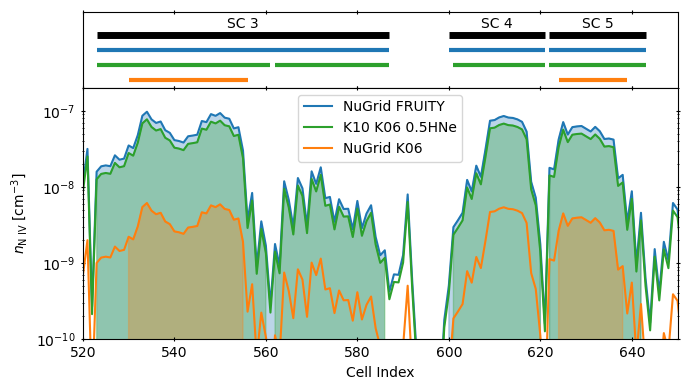

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,4), sharex=True, gridspec_kw={'height_ratios':(0.3,1)}, squeeze=False)

# Demo intervals
ax[0,0].hlines(3, *match_ivl, colors='k', lw=5)
ax[0,0].hlines(2, *match_ivl, colors='C0', lw=3)
ax[0,0].hlines([1,1], [split_ivls[0][0], split_ivls[1][0]], [split_ivls[0][1], split_ivls[1][1]], colors='C2', lw=3)
ax[0,0].hlines(0, *short_ivl, colors='C1', lw=3)

# Other intervals - "pat" signifies abundance pattern, which keys to color
ax[0,0].hlines(3, *match[match_pat][4], colors='k', lw=5)
ax[0,0].hlines(3, *match[match_pat][5], colors='k', lw=5)
ax[0,0].hlines(2, *match[match_pat][4], colors='C0', lw=3)
ax[0,0].hlines(2, *match[match_pat][5], colors='C0', lw=3)
ax[0,0].hlines(1, *match[split_pat][0], colors='C2', lw=3)
ax[0,0].hlines(1, *short[split_pat][0], colors='C2', lw=3)
ax[0,0].hlines(0, *short[short_pat][1], colors='C1', lw=3)
#ax[0,0].hlines(0, *short[short_pat][2], colors='C1', lw=3)

# Label superclumps
ax[0,0].text(np.mean(match_ivl), 3.5, "SC 3", horizontalalignment="center")
ax[0,0].text(np.mean(match[match_pat][4]), 3.5, "SC 4", horizontalalignment="center")
ax[0,0].text(np.mean(match[match_pat][5]), 3.5, "SC 5", horizontalalignment="center")

ax[0,0].set_ylim(-0.5, 4.5)
#ax[0,0].axis('off')
ax[0,0].tick_params(which='both', labelleft=False, left=False, right=False, labelbottom=False)
#ax[0,0].set_title("Absorber and Superclump Span")


# Demo intervals
mx1 = np.arange(*match_ivl)
my1 = match_ndens[slice(*match_ivl)]
# Extra intervals
mx2 = np.arange(*match[match_pat][4])
my2 = match_ndens[slice(*match[match_pat][4])]
mx3 = np.arange(*match[match_pat][5])
my3 = match_ndens[slice(*match[match_pat][5])]

ax[1,0].semilogy(match_ndens, color='C0', label=model_names[match_pat])
ax[1,0].fill_between(mx1, my1,
                     #np.min(my1)*np.ones_like(mx1),
                     alpha=0.3)
ax[1,0].fill_between(mx2, my2, color='C0', alpha=0.3)
ax[1,0].fill_between(mx3, my3, color='C0', alpha=0.3)

# Demo intervals
spx1 = np.arange(*split_ivls[0])
spx2 = np.arange(*split_ivls[1])
spy1 = split_ndens[slice(*split_ivls[0])]
spy2 = split_ndens[slice(*split_ivls[1])]
# Extra intervals
spx3 = np.arange(*match[split_pat][0])
spy3 = split_ndens[slice(*match[split_pat][0])]
spx4 = np.arange(*short[split_pat][0])
spy4 = split_ndens[slice(*short[split_pat][0])]

ax[1,0].semilogy(split_ndens, color='C2', label=model_names[split_pat])
ax[1,0].fill_between(spx1,  spy1,
                     #np.min(spy1)*np.ones_like(spx1),
                     alpha=0.3,
                     color='C2')
ax[1,0].fill_between(spx2, spy2,
                     #np.min(spy2)*np.ones_like(spx2),
                     alpha=0.3,
                     color='C2')
ax[1,0].fill_between(spx3, spy3, color='C2', alpha=0.3)
ax[1,0].fill_between(spx4, spy4, color='C2', alpha=0.3)

# Demo intervals
shx1 = np.arange(*short_ivl)
shy1 = short_ndens[short_ivl[0]:short_ivl[1]]
# Extra intervals
shx2 = np.arange(*short[short_pat][1])
shy2 = short_ndens[slice(*short[short_pat][1])]
#shx3 = np.arange(*short[short_pat][2])
#shy3 = short_ndens[slice(*short[short_pat][2])]

ax[1,0].semilogy(short_ndens, color='C1', label=model_names[short_pat])
ax[1,0].fill_between(shx1, shy1,
                     #np.min(shy1)*np.ones_like(shx1),
                     alpha=0.3,
                     color='C1')
ax[1,0].fill_between(shx2, shy2, color='C1', alpha=0.3)
#ax[1,0].fill_between(shx3, shy3, color='C1', alpha=0.3)

ax[1,0].set_xlim(520, 650)
ax[1,0].set_ylim(1e-10, 2e-7)
ax[1,0].set_xlabel("Cell Index")
ax[1,0].set_ylabel(r"$n_\mathrm{N\ IV}$ [cm$^{-3}$]")
ax[1,0].legend(loc='upper center')

fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig("superclump_demo_alt.pdf")

In [22]:
short_ndens[600:620].max(), short_ndens[620:640].max() 

(5.3947162036155934e-09 cm**(-3), 4.484520295389988e-09 cm**(-3))